In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("1.csv", "r") as file:
    line = file.readline()
    values = [float(v) for v in line.strip().split(",")]

In [3]:
data = np.array(values).reshape(-1, 2)

In [4]:
center = np.mean(data, axis=0)

In [5]:
centered_data = data - center

In [6]:
cov_matrix = np.cov(centered_data, rowvar=False)

In [7]:
eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)

In [8]:
order = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[order]
eig_vecs = eig_vecs[:, order]

In [9]:
angle_rad = np.arctan2(eig_vecs[1, 0], eig_vecs[0, 0])

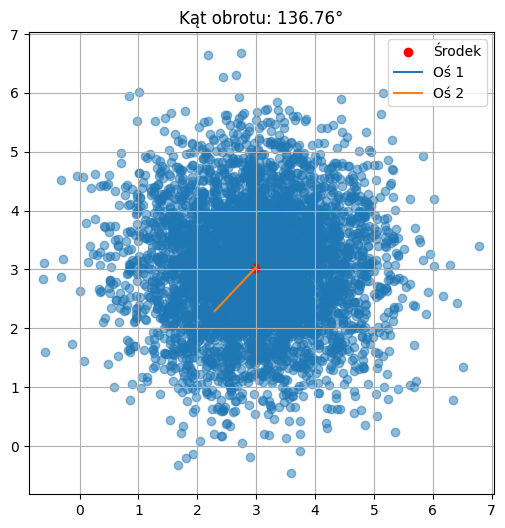

In [10]:
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.scatter(center[0], center[1], color='red', label='Środek')
for i in range(2):
    vec = eig_vecs[:, i]
    scale = np.sqrt(eig_vals[i])
    plt.plot(
        [center[0], center[0] + vec[0] * scale],
        [center[1], center[1] + vec[1] * scale],
        label=f'Oś {i+1}'
    )
plt.axis('equal')
plt.legend()
plt.title(f'Kąt obrotu: {np.degrees(angle_rad):.2f}°')
plt.grid(True)
plt.show()